# Artificial Intelligence, Project 2.1

The project for the machine learning part will also be split into two sub projects.

There are two parts to the first sub project (of project 2):

* Implementing a perceptron
* Implementing Linear Regression, including backpropagation

**Deadline:** 03.07.2018

Submit your solution (only the ipynb file) to AI.SS18@l3s.de@l3s.de using the subject:

```
AI18Project2.1:  [YourNames]
```

Please be sure to provide your matriculation numbers in the email.

File naming convention:

**`[FirstName]_[FamilyName]_[MatriculationNumber]_project_2_1.ipynb`**

Where `[FirstName]_[FamilyName]_[MatriculationNumber]` is added **per participant** in the group (max 2) and devided by a `_` if there are two group members.

## Methods you might need

* [numpy.sum](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.sum.html)
* [numpy.random.randn](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randn.html)
* [numpy.zeros](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.zeros.html)

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Input data

In [2]:
n_features = 2
X, y = datasets.make_classification(
    n_samples=1000,
    n_features=n_features,
    n_informative=n_features,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=1,
    class_sep=100,
    random_state=2)
y[y == 0] = -1

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

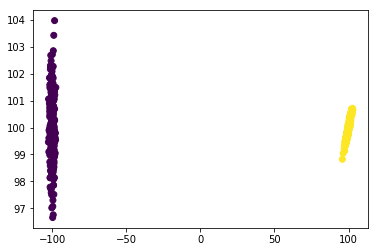

In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

Let's check the shapes of the actual data:

In [5]:
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_train: (800, 2)
y_train: (800,)


Let's define a method that calculates the mean squared error:

In [6]:
def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [7]:
def accuracy(y, y_pred):
    return np.mean(y == y_pred) * 100

# Perceptron

Implement the perceptron algorithm with the update rule shown in the lecture/tutorial. Feel free to ignore the bias in this case. Results should already be very good (MSE below 0.1 for both train and test data).

In [8]:
def activation(x):
    tmp = np.sign(x)
    # change all zeroes to -1
    tmp[tmp == 0] = -1
    
    return tmp

Return predictions, given the weights and some examples

In [9]:
def predict_perceptron(w, X):
    return activation(np.sum(X * w, axis=1))

In [10]:
def perceptron(X, y, learning_rate=0.1, max_num_iterations=50):
    # 1. Initializing the weights to a random small value
    m,n = np.shape(X)
    w = np.random.random(n)*0.01
    #print(w)
    #w= [0.0 for i in range(len(X[0]))]
    for epoch in range(max_num_iterations):
        loss = 0.0
        for x in range(m):
            prediction = predict_perceptron(w,X)
            error = y[x] - prediction[x]
            loss = loss + error**2
            #w[0] = w[0] + learning_rate * error
            for i in range(n):
                w[i] = w[i] + learning_rate * error * X[x,i]
        if epoch%10==0:
            print('>====epoch=%d, lrate=%.3f, loss=%.3f' % (epoch, learning_rate, loss))
    return w

In [11]:
w = perceptron(X_train, y_train)
y_pred = predict_perceptron(w, X_train)
print("MSE:", mse(y_train, y_pred))

>====epoch=0, lrate=0.100, loss=64.000
>====epoch=10, lrate=0.100, loss=56.000
>====epoch=20, lrate=0.100, loss=56.000
>====epoch=30, lrate=0.100, loss=56.000
>====epoch=40, lrate=0.100, loss=56.000
MSE: 0.035


In [12]:
print("Accuracy:", accuracy(y_train, y_pred))

Accuracy: 99.125


In [13]:
y_pred = predict_perceptron(w, X_test)
print("MSE:", mse(y_test, y_pred))

MSE: 0.08


In [14]:
print("Accuracy:", accuracy(y_test, y_pred))

Accuracy: 98.0


# Linear Regression

Implement Linear Regression, use backpropagation to update the weights. MSE around or below 0.1 for test and train set after 500 iterations.

In [15]:
# no activation function here
def predict_lr(w, X):
    return X.dot(w.reshape(w.shape[0], -1)).reshape(X.shape[0],)

Feel free to set n_features to 1 and start implementing with that and later set it back to 2.

In [16]:
n_features=1
X, y = datasets.make_regression(
    n_samples=1000,
    n_features=n_features,
    n_informative=n_features,
    noise=0.01,
    random_state=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

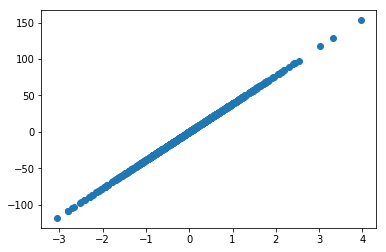

In [18]:
if n_features == 1:
    plt.scatter(X_train[:, 0], y_train)
    plt.show()
if n_features == 2:
    fig = plt.figure(figsize=(14,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs=X_train[:, 0], ys=X_train[:, 1], zs=y_train, c=y_train, s=70)

The following will add an extra column filled with 1 for all rows for the bias.

In [19]:
X_train = np.hstack((np.ones(800).reshape(800, 1), X_train))
X_test = np.hstack((np.ones(200).reshape(200, 1), X_test))

In [20]:
def linear_regression(X, y, learning_rate=0.01, max_num_iterations=1000, opt=True):
    # 1. Initializing the weights to a random small value
    m,n = np.shape(X)
    w = np.random.rand(n)*0.01
    #w= [0.0 for i in range(len(X[0])+1)]
    for epoch in range(max_num_iterations):
        prediction = predict_lr(w,X)
        delta_w = np.zeros(n)
        for x in range(m):           
            error = y[x] - prediction[x]
            for i in range(n):
                delta_w[i] += error * X[x,i]
        w = w + learning_rate*delta_w/m
        if epoch%100==0:
            print('>====epoch=%d, lrate=%.3f, loss=%.3f' % (epoch, learning_rate, np.sum( (y - prediction) ** 2)))
    return w

You can use the following to plot the line created by linear regression.

>====epoch=0, lrate=0.010, loss=1152392.198
>====epoch=100, lrate=0.010, loss=166589.184
>====epoch=200, lrate=0.010, loss=24139.578
>====epoch=300, lrate=0.010, loss=3505.701
>====epoch=400, lrate=0.010, loss=510.207
>====epoch=500, lrate=0.010, loss=74.449
>====epoch=600, lrate=0.010, loss=10.940
>====epoch=700, lrate=0.010, loss=1.668
>====epoch=800, lrate=0.010, loss=0.312
>====epoch=900, lrate=0.010, loss=0.114
Final MSE: 0.08441746693733523


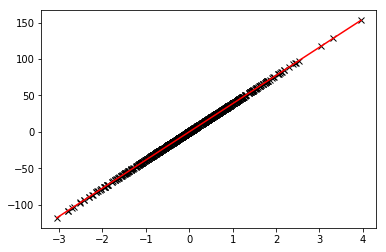

In [21]:
w = linear_regression(X_train, y_train)
y_pred = predict_lr(w, X_train)
print("Final MSE:",np.sum( (y_train - y_pred) ** 2))

if n_features == 1:
    tt = np.linspace(np.min(X_train[:, 1]), np.max(X_train[:, 1]), 10)
    bf_line = w[0]+w[1]*tt
    plt.plot(X_train[:, 1], y_train, 'kx', tt, bf_line, 'r-')
    plt.show()

if n_features == 2:
    fig = plt.figure(figsize=(14,10))
    ax = fig.add_subplot(211, projection='3d')
    ax.scatter(xs=X_train[:, 1], ys=X_train[:, 2], zs=y_train, c=y_train, s=50)
    ay = fig.add_subplot(212, projection='3d')
    ay.scatter(xs=X_train[:, 1], ys=X_train[:, 2], zs=y_pred, c=y_train, s=50)

Final MSE: 0.022330498362749814


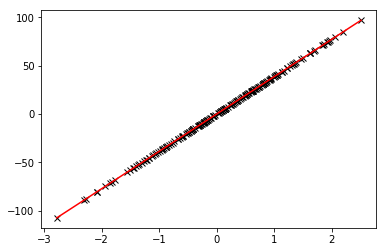

In [22]:
y_pred = predict_lr(w, X_test)
print("Final MSE:", np.sum( (y_test - y_pred) ** 2))

if n_features == 1:
    tt = np.linspace(np.min(X_test[:, 1]), np.max(X_test[:, 1]), 10)
    bf_line = w[0]+w[1]*tt
    plt.plot(X_test[:, 1], y_test, 'kx', tt, bf_line, 'r-')
    plt.show()

if n_features == 2:
    fig = plt.figure(figsize=(14,10))
    ax = fig.add_subplot(211, projection='3d')
    ax.scatter(xs=X_test[:, 1], ys=X_test[:, 2], zs=y_test, c=y_test, s=50)
    ay = fig.add_subplot(212, projection='3d')
    ay.scatter(xs=X_test[:, 1], ys=X_test[:, 2], zs=y_pred, c=y_test, s=50)